In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_excel('card_customer_data.xlsx')

In [4]:
data.head()

,CLIENTNUM,Education_Level,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Utilization_Ratio,Total_Trans_Amt,Total_Trans_Ct
0,769911858,High School,Blue,34,3,4,3313.0,2517,0.760,1171,20
1,713061558,Graduate,Blue,36,3,1,4010.0,1247,0.311,1088,24
2,818906208,High School,Silver,27,2,2,29081.0,1396,0.048,1538,36
3,710599683,College,Blue,36,3,6,11751.0,0,0.000,1539,17
4,712396908,Graduate,Blue,48,5,2,2436.0,680,0.279,1570,29


In [5]:
data.shape

(3078, 11)

In [6]:
data.dtypes

CLIENTNUM                     int64
Education_Level              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Utilization_Ratio       float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
dtype: object

In [7]:
data.drop(['CLIENTNUM'],axis = 1, inplace = True)

In [8]:
data.head()

,Education_Level,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Utilization_Ratio,Total_Trans_Amt,Total_Trans_Ct
0,High School,Blue,34,3,4,3313.0,2517,0.760,1171,20
1,Graduate,Blue,36,3,1,4010.0,1247,0.311,1088,24
2,High School,Silver,27,2,2,29081.0,1396,0.048,1538,36
3,College,Blue,36,3,6,11751.0,0,0.000,1539,17
4,Graduate,Blue,48,5,2,2436.0,680,0.279,1570,29


In [9]:
num = data.select_dtypes(include = 'number')
char = data.select_dtypes(include = 'object')

In [10]:
num.dtypes

Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Utilization_Ratio       float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
dtype: object

In [11]:
char.dtypes

Education_Level    object
Card_Category      object
dtype: object

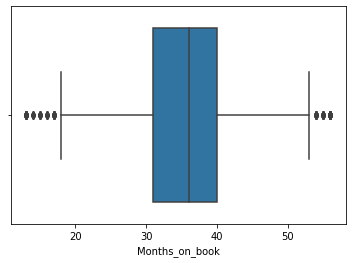

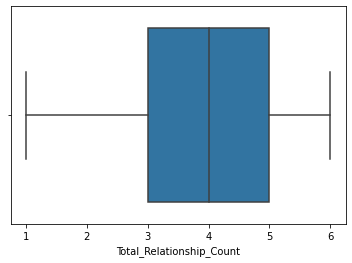

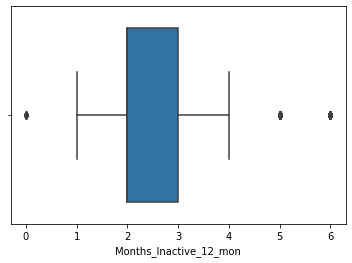

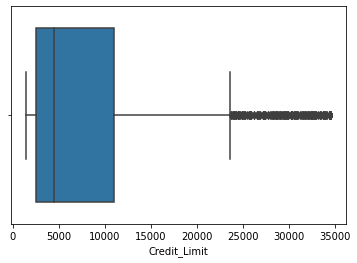

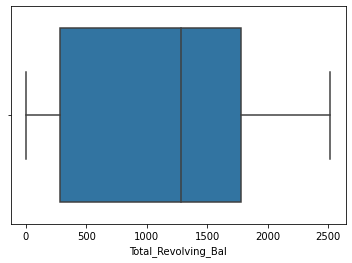

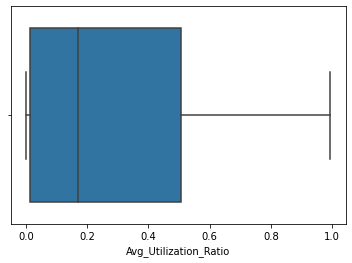

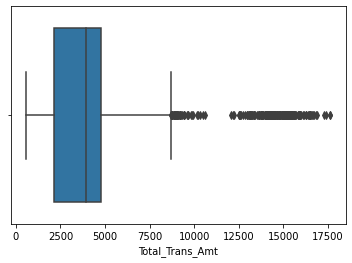

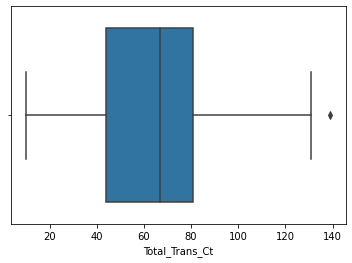

In [12]:
for col in num.columns:
    plt.figure()
    sns.boxplot(num[col])

In [15]:
for col in num.columns:
    q1 = num[col].quantile(0.25)
    q3 = num[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    num[col] = np.where(num[col]<lower,lower,num[col])
    num[col] = np.where(num[col]>upper,upper,num[col])

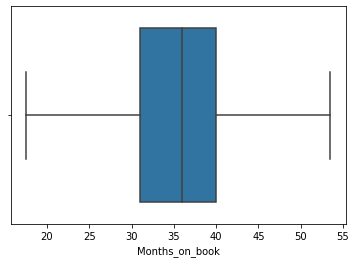

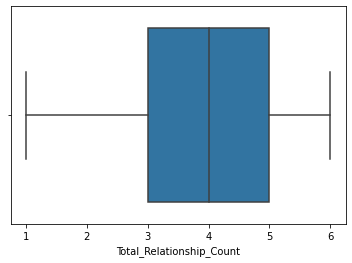

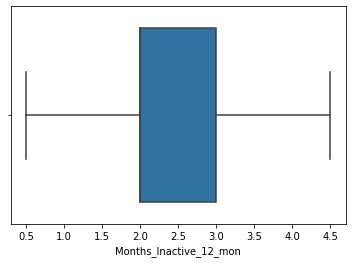

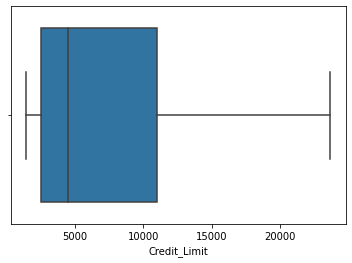

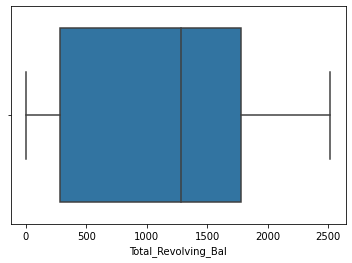

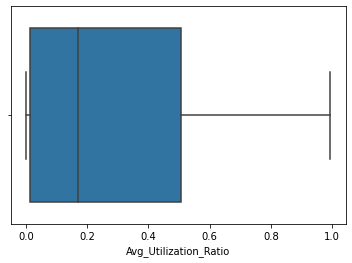

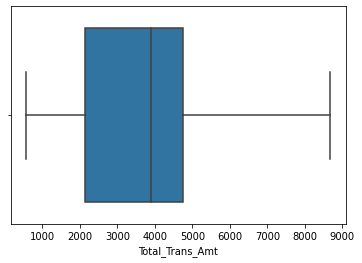

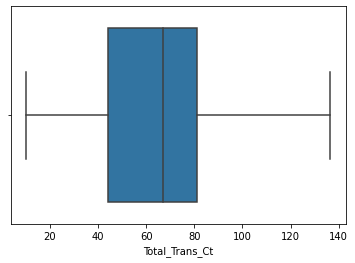

In [16]:
for col in num.columns:
    plt.figure()
    sns.boxplot(num[col])

In [17]:
num.isnull().sum()

Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Utilization_Ratio       0
Total_Trans_Amt             0
Total_Trans_Ct              0
dtype: int64

In [18]:
num['Average_Spend'] = num['Total_Trans_Amt']/num['Total_Trans_Ct']

In [19]:
num.head()

,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Utilization_Ratio,Total_Trans_Amt,Total_Trans_Ct,Average_Spend
0,34.0,3.0,4.0,3313.0,2517.0,0.760,1171.0,20.0,58.550000
1,36.0,3.0,1.0,4010.0,1247.0,0.311,1088.0,24.0,45.333333
2,27.0,2.0,2.0,23655.0,1396.0,0.048,1538.0,36.0,42.722222
3,36.0,3.0,4.5,11751.0,0.0,0.000,1539.0,17.0,90.529412
4,48.0,5.0,2.0,2436.0,680.0,0.279,1570.0,29.0,54.137931


In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
num_std = pd.DataFrame(sc.fit_transform(num),columns = num.columns)

In [21]:
num_std.head()

,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Utilization_Ratio,Total_Trans_Amt,Total_Trans_Ct,Average_Spend
0,-0.233573,-0.481448,1.812931,-0.630489,1.667223,1.754925,-1.267140,-1.886456,-0.006748
1,0.021437,-0.481448,-1.427918,-0.533627,0.110202,0.134104,-1.304997,-1.717041,-0.759219
2,-1.126109,-1.124354,-0.347635,2.196440,0.292876,-0.815286,-1.099746,-1.208796,-0.907879
3,0.021437,-0.481448,2.353072,0.542141,-1.418621,-0.988559,-1.099290,-2.013517,1.813951
4,1.551499,0.804363,-0.347635,-0.752366,-0.584940,0.018589,-1.085150,-1.505272,-0.257943


<AxesSubplot:>

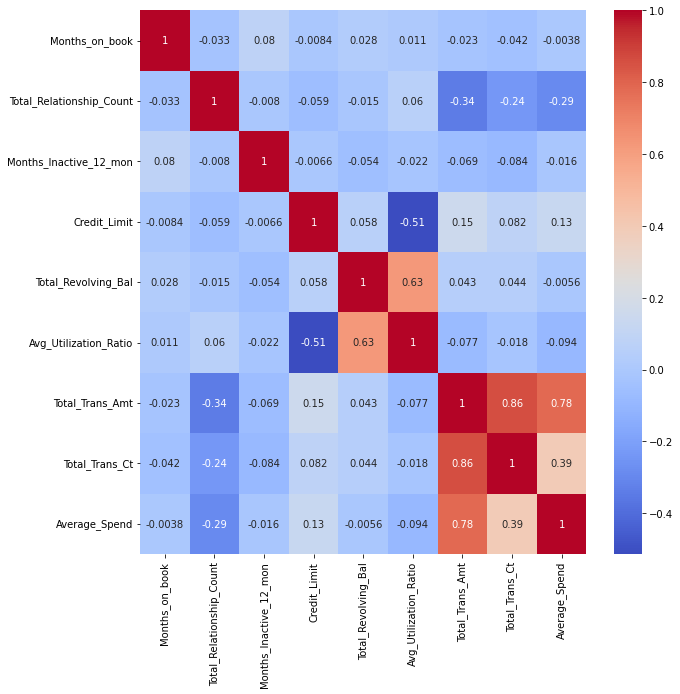

In [23]:
plt.figure(figsize = (10,10))
sns.heatmap(num_std.corr(), annot = True, cmap = 'coolwarm')

In [24]:
num_std.drop(['Credit_Limit','Total_Revolving_Bal','Total_Trans_Amt','Total_Trans_Ct','Total_Relationship_Count'], axis=1, inplace = True)

<AxesSubplot:>

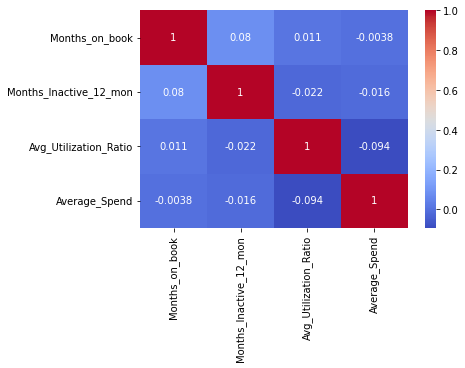

In [26]:
sns.heatmap(num_std.corr(), annot = True, cmap = 'coolwarm')

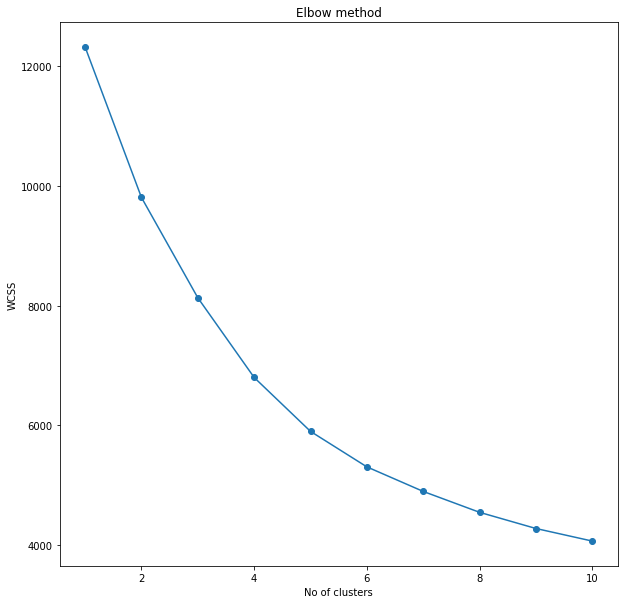

In [28]:
plt.figure(figsize = (10,10))
from sklearn.cluster import KMeans
wcss = []
K = range(1,11)
for i in K:
    kmeans = KMeans(n_clusters=i, init = 'k-means++', random_state=42)
    kmeans.fit(num_std)
    wcss.append(kmeans.inertia_)
plt.plot(K,wcss,'o-')
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.title('Elbow method')
plt.show()

In [39]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_means = kmeans.fit_predict(num_std)
num_std['Cluster_Label'] = pd.DataFrame(y_means)

In [40]:
from sklearn.metrics import silhouette_score
cluster_label = num_std['Cluster_Label']
sil_score = silhouette_score(num_std, cluster_label)
print('silhouette_score is ' + str(sil_score))
from sklearn.metrics import davies_bouldin_score
dav_bol_score = davies_bouldin_score(num_std, cluster_label)
print('davies_bouldin_score is ' + str(dav_bol_score))

silhouette_score is 0.3443357796216352
davies_bouldin_score is 1.0684012265796916


In [41]:
num['Cluster_Label'] = num_std['Cluster_Label']

In [42]:
num['Cluster_Label'].value_counts()

4    799
3    746
2    627
1    508
0    398
Name: Cluster_Label, dtype: int64

In [43]:
num.groupby('Cluster_Label').agg(['mean'])

,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Utilization_Ratio,Total_Trans_Amt,Total_Trans_Ct,Average_Spend
,mean,mean,mean,mean,mean,mean,mean,mean,mean
Cluster_Label,,,,,,,,,
0,36.108040,2.459799,2.280151,12385.280402,1197.814070,0.144367,7565.066583,82.984925,92.558633
1,25.676181,4.096457,1.897638,8815.534252,969.277559,0.161173,3304.871063,61.990157,51.833259
2,40.328549,3.976077,1.503987,9173.744817,986.655502,0.144085,3505.022329,63.001595,53.685297
3,38.161528,3.813673,3.231903,9283.997051,813.975871,0.108361,3176.612601,58.274129,52.936874
4,36.447434,3.931164,2.404255,2598.827660,1710.400501,0.666333,3627.296621,64.032541,55.394896


In [44]:
data_all = pd.concat([num,char],axis = 1)

In [45]:
data_all.head()

,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Utilization_Ratio,Total_Trans_Amt,Total_Trans_Ct,Average_Spend,Cluster_Label,Education_Level,Card_Category
0,34.0,3.0,4.0,3313.0,2517.0,0.760,1171.0,20.0,58.550000,4,High School,Blue
1,36.0,3.0,1.0,4010.0,1247.0,0.311,1088.0,24.0,45.333333,2,Graduate,Blue
2,27.0,2.0,2.0,23655.0,1396.0,0.048,1538.0,36.0,42.722222,1,High School,Silver
3,36.0,3.0,4.5,11751.0,0.0,0.000,1539.0,17.0,90.529412,0,College,Blue
4,48.0,5.0,2.0,2436.0,680.0,0.279,1570.0,29.0,54.137931,2,Graduate,Blue


In [47]:
pd.crosstab(index = data_all['Cluster_Label'], columns = data_all['Card_Category'], values = data_all['Card_Category'],aggfunc='count')

Card_Category,Blue,Gold,Platinum,Silver
Cluster_Label,,,,
0,317.0,15.0,7.0,59.0
1,464.0,6.0,NaN,38.0
2,585.0,6.0,4.0,32.0
3,701.0,7.0,1.0,37.0
4,799.0,NaN,NaN,NaN


In [49]:
pd.crosstab(index = data_all['Cluster_Label'], columns = data_all['Card_Category'], values = data_all['Total_Trans_Amt'],aggfunc='mean')

Card_Category,Blue,Gold,Platinum,Silver
Cluster_Label,,,,
0,7511.518927,8102.633333,7435.571429,7731.466102
1,3236.568966,4707.666667,NaN,3917.381579
2,3464.713675,4948.833333,3446.375000,3978.531250
3,3112.114836,5533.928571,8679.500000,3803.878378
4,3627.296621,NaN,NaN,NaN


<AxesSubplot:xlabel='Cluster_Label', ylabel='Avg_Utilization_Ratio'>

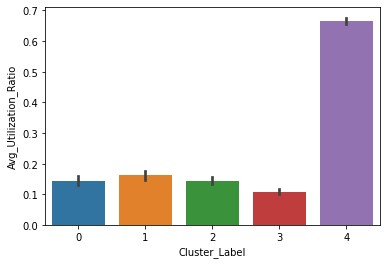

In [52]:
sns.barplot(x = 'Cluster_Label', y = 'Avg_Utilization_Ratio', data = data_all, estimator = np.mean)

<AxesSubplot:xlabel='Cluster_Label', ylabel='Months_on_book'>

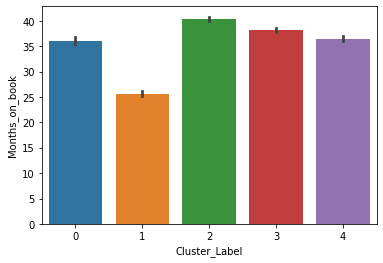

In [53]:
sns.barplot(x = 'Cluster_Label', y = 'Months_on_book', data = data_all, estimator = np.mean)

<AxesSubplot:xlabel='Cluster_Label', ylabel='Months_Inactive_12_mon'>

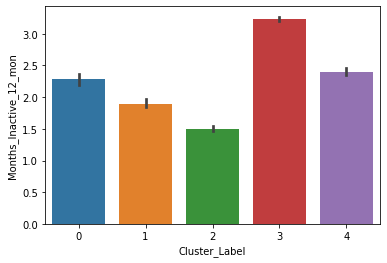

In [54]:
sns.barplot(x = 'Cluster_Label', y = 'Months_Inactive_12_mon', data = data_all, estimator = np.mean)

<AxesSubplot:xlabel='Cluster_Label', ylabel='Average_Spend'>

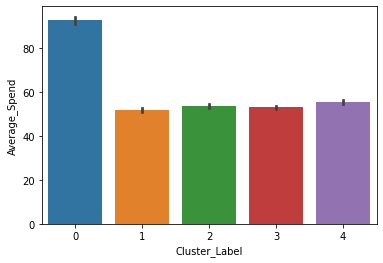

In [55]:
sns.barplot(x = 'Cluster_Label', y = 'Average_Spend', data = data_all, estimator = np.mean)

In [56]:
data_cluster0 = data_all[data_all['Cluster_Label'] == 0]

In [57]:
data_cluster0.shape

(398, 12)